<CENTER><H1>DNA SEQUENCING USING NEURAL NETWORKS</H1></CENTER>

<img src="https://www.sigmaaldrich.com/deepweb/assets/sigmaaldrich/marketing/global/images/technical-documents/protocols/genomics/sequencing/sanger-sequencing_dna-structure/sanger-sequencing_dna-structure.png"/>

Install BioPython module

In [ ]:
pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.8 MB/s eta 0:00:00


Import BioPython module

In [ ]:
from Bio import SeqIO
for sequence in SeqIO.parse('/content/drive/MyDrive/DNA SEQUENCING/example.fa', "fasta"):
    print(sequence.id)
    print(sequence.seq)
    print(len(sequence))

ENST00000435737.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGAAGTCCTGGGGCTGACTCTCATTGTCTGGATTGACTGA
390
ENST00000419127.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCGTCTCTCAATCAAGTCCATCCAAATCGAAGCCGACAACTGTGTCACTGACTCCCTGACCATTTACGACTCCCTTTTGCCCATCCGGAGCAG

Import numpy, pandas and matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read Human DNA

In [ ]:
human_dna = pd.read_table('/content/drive/MyDrive/DNA SEQUENCING/human_data.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Read Chimpanzee DNA

In [ ]:
chimp_dna = pd.read_table('/content/drive/MyDrive/DNA SEQUENCING/chimp_data.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


Read Dog DNA

In [ ]:
dog_dna = pd.read_table('/content/drive/MyDrive/DNA SEQUENCING/dog_data.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


Function to collect all possible overlapping k-mers of a specified length from any sequence string

In [ ]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

Convert our training data sequences into short overlapping k-mers of legth 6

In [ ]:
human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

In [ ]:
chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

In [ ]:
dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

Convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use

In [ ]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_human = human_dna.iloc[:, 0].values 

In [ ]:
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chim = chimp_dna.iloc[:, 0].values 

In [ ]:
dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_dna.iloc[:, 0].values  

Import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Creating the Bag of Words model using CountVectorizer()

In [ ]:
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

Print Human Data Shape

In [ ]:
print(X.shape)

(4380, 232414)


Print Chimp Data Shape

In [ ]:
print(X_chimp.shape)

(1682, 232414)


Print Dog Data Shape

In [ ]:
print(X_dog.shape)

(820, 232414)


Plot Human DNA Data

<Axes: >

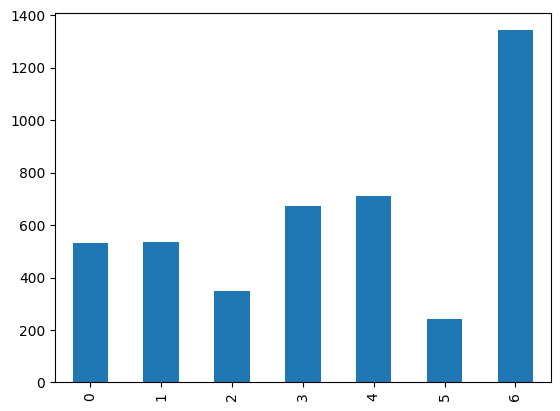

In [ ]:
human_dna['class'].value_counts().sort_index().plot.bar()

Plot Chimp DNA Data

<Axes: >

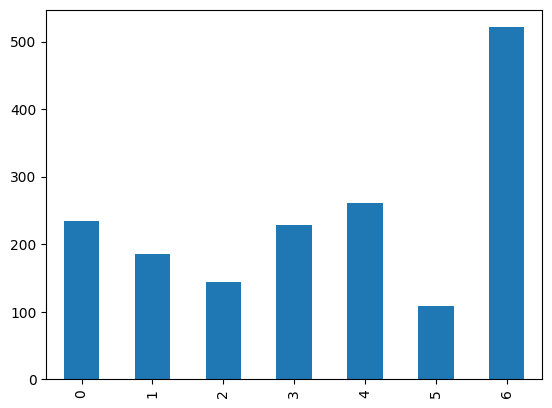

In [ ]:
chimp_dna['class'].value_counts().sort_index().plot.bar()

Plot Dog DNA Data

<Axes: >

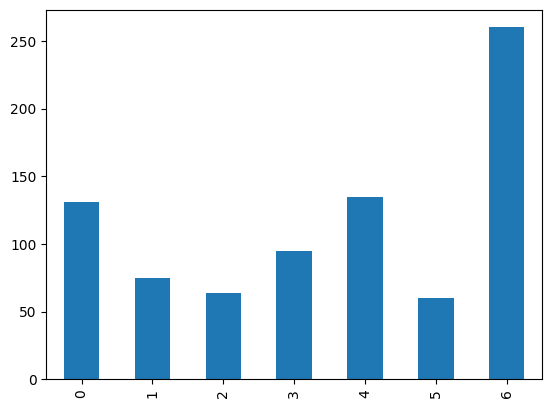

In [ ]:
dog_dna['class'].value_counts().sort_index().plot.bar()

Splitting the human dataset into the training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_human, test_size = 0.20,random_state=42)

Print Shape of train and test

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

Predictions on the human hold out test set

In [ ]:
y_pred = classifier.predict(X_test)

Confusion Matrix for Human DNA

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263


Print metrics

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


Predict Chimp and Dog

In [ ]:
y_pred_chimp = classifier.predict(X_chimp)
y_pred_dog = classifier.predict(X_dog)

Confusion Matrix for Chimp DNA

In [ ]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))

Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521


Print Metrics

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


Confusion Matrix for Dog DNA

In [ ]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))

Confusion matrix

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260


Print Metrics

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925


Import Packages

In [ ]:
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

plt.rcParams['figure.figsize'] = (8, 8)

DataSet

In [ ]:
# UCI molecular biology (promoter gene sequences dataset)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']

data = pd.read_csv(url, names=names)
data.head()

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


Data Processing

In [ ]:
# build dataset using a custom pandas dataframe
# each column in a dataframe is called a series
classes = data.loc[:, 'Class']
classes.value_counts()

+    53
-    53
Name: Class, dtype: int64

In [ ]:
# Generate list of DNA sequences
sequences = data.loc[:, 'Sequence'].tolist()
dataset = {}

# Loop throught the sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
    # split into nucleotides, remove tab characters
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    
    # Append class assignment
    nucleotides.append(classes[i])
    
    # add to dataset
    dataset[i] = nucleotides
    
print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [ ]:
# Turn dataset into pandas dataframe
df = pd.DataFrame(dataset).T
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,c,c,t,c,a,a,t,g,g,c,...,g,a,a,c,t,a,t,a,t,-
102,g,t,a,t,t,c,t,c,a,a,...,t,c,a,a,c,a,t,t,g,-
103,c,g,c,g,a,c,t,a,c,g,...,a,a,g,g,c,t,t,c,c,-
104,c,t,c,g,t,c,c,t,c,a,...,a,g,g,a,g,g,a,a,c,-


In [ ]:
# rename the last column to class
df.rename(columns={57: 'Class'}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,c,c,t,c,a,a,t,g,g,c,...,g,a,a,c,t,a,t,a,t,-
102,g,t,a,t,t,c,t,c,a,a,...,t,c,a,a,c,a,t,t,g,-
103,c,g,c,g,a,c,t,a,c,g,...,a,a,g,g,c,t,t,c,c,-
104,c,t,c,g,t,c,c,t,c,a,...,a,g,g,a,g,g,a,a,c,-


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,c,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [ ]:
# Record value counts for each sequence
series = []

for name in df.columns:
    series.append(df[name].value_counts())
    
info = pd.DataFrame(series)
details = info.T
details

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
t,38.0,26.0,27.0,26.0,22.0,24.0,30.0,32.0,32.0,28.0,...,21.0,22.0,23.0,33.0,35.0,30.0,23.0,29.0,34.0,NaN
c,27.0,22.0,21.0,30.0,19.0,18.0,21.0,20.0,22.0,22.0,...,36.0,42.0,31.0,32.0,21.0,32.0,29.0,29.0,17.0,NaN
a,26.0,34.0,30.0,22.0,36.0,42.0,38.0,34.0,33.0,36.0,...,23.0,24.0,28.0,27.0,25.0,22.0,26.0,24.0,27.0,NaN
g,15.0,24.0,28.0,28.0,29.0,22.0,17.0,20.0,19.0,20.0,...,26.0,18.0,24.0,14.0,25.0,22.0,28.0,24.0,28.0,NaN
+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0
-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0


In [ ]:
# Switch to numerical data using pd.get_dummies()
numerical_df = pd.get_dummies(df)
numerical_df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [ ]:
# Remove one of the class columns and rename to simply 'Class'
df = numerical_df.drop(columns=['Class_-'])

df.rename(columns={'Class_+':'Class'}, inplace=True)
df

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class
0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
102,0,0,1,0,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
103,0,1,0,0,0,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,0
104,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0


Build the Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold, train_test_split, cross_val_score

In [ ]:
# Create X and y dataset for training
X = df.drop(['Class'], axis=1).to_numpy()
y = df['Class'].to_numpy()

# Split the data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [ ]:
# Define scoring method
scoring = 'accuracy'

# Define models to train
names = ['K Nearest Neighbors', 'Gaussian Process', 'Decision Tree', 'Random Forest', 
         'Neural Network', 'AdaBoost', 'Naive Bayes', 'SVM Linear', 'SVM RBF', 'SVM Sigmoid']

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=500),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    SVC(kernel='sigmoid')
]

models = zip(names, classifiers)

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '{0}:  {1}  ({2})'.format(name, cv_results.mean(), cv_results.std())
    print(msg)

K Nearest Neighbors:  0.7696428571428571  (0.11721959594483079)
Gaussian Process:  0.8732142857142857  (0.1251147432543097)
Decision Tree:  0.8357142857142857  (0.09708769442191562)
Random Forest:  0.6339285714285714  (0.10046130842168002)
Neural Network:  0.8625  (0.10383279828647594)
AdaBoost:  0.8357142857142857  (0.0793789670389031)
Naive Bayes:  0.8357142857142857  (0.1252039153068436)
SVM Linear:  0.8732142857142857  (0.1251147432543097)
SVM RBF:  0.925  (0.082915619758885)
SVM Sigmoid:  0.8732142857142857  (0.0792382419011921)


In [ ]:
models = zip(names, classifiers)
# Test the algorithm on the validation dataset
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

K Nearest Neighbors
0.8148148148148148
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.71      1.00      0.83        12

    accuracy                           0.81        27
   macro avg       0.85      0.83      0.81        27
weighted avg       0.87      0.81      0.81        27

Gaussian Process
0.9259259259259259
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.92      0.92      0.92        12

    accuracy                           0.93        27
   macro avg       0.93      0.93      0.93        27
weighted avg       0.93      0.93      0.93        27

Decision Tree
0.7407407407407407
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.69      0.75      0.72        12

    accuracy                           0.74        27
   macro avg       0

Install BioPython

In [ ]:
pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Visualize the DNA Sequence file

Number of sequences: 2
Minimum length of sequences: 390


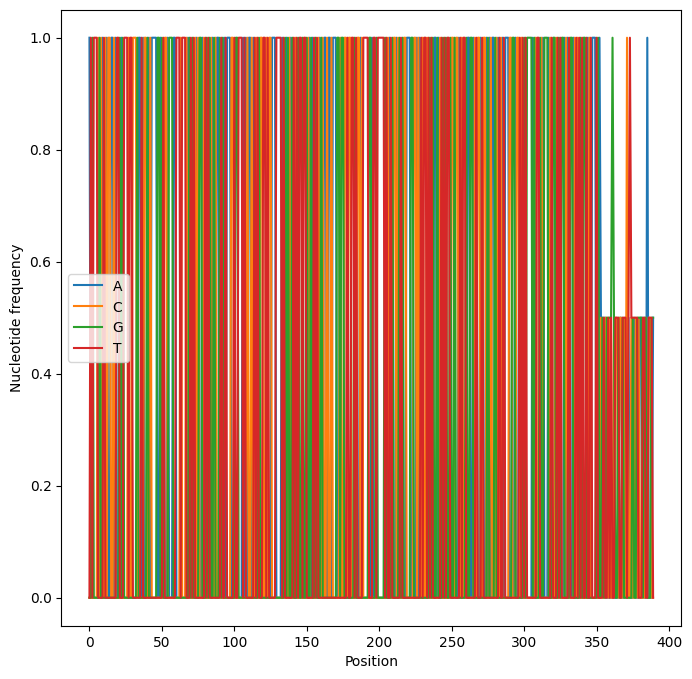

In [ ]:
from Bio import SeqIO
from collections import Counter
import matplotlib.pyplot as plt

# Load the DNA sequence data from a FASTA file
sequences = []
for record in SeqIO.parse("/content/drive/MyDrive/DNA SEQUENCING/example.fa", "fasta"):
    sequences.append(str(record.seq))

# Determine the length of the shortest sequence
min_length = min(len(seq) for seq in sequences)

# Print some basic statistics about the sequences
print(f"Number of sequences: {len(sequences)}")
print(f"Minimum length of sequences: {min_length}")

# Calculate the nucleotide frequency for each position in the sequences
nucleotides = ['A', 'C', 'G', 'T']
counts = [{nt: 0 for nt in nucleotides} for i in range(min_length)]
for seq in sequences:
    for i, nt in enumerate(seq[:min_length]):
        counts[i][nt] += 1

# Plot the nucleotide frequency at each position
fig, ax = plt.subplots()
for nt in nucleotides:
    ax.plot([count[nt] / sum(count.values()) for count in counts], label=nt)
ax.set_xlabel("Position")
ax.set_ylabel("Nucleotide frequency")
ax.legend()
plt.show()


In [ ]:
# DNA sequences for human, dog, and chimp
human_dna1 = "ATCGGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAG"
dog_dna1 = "ATCGGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAG"
chimp_dna1 = "ATCGGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAG"

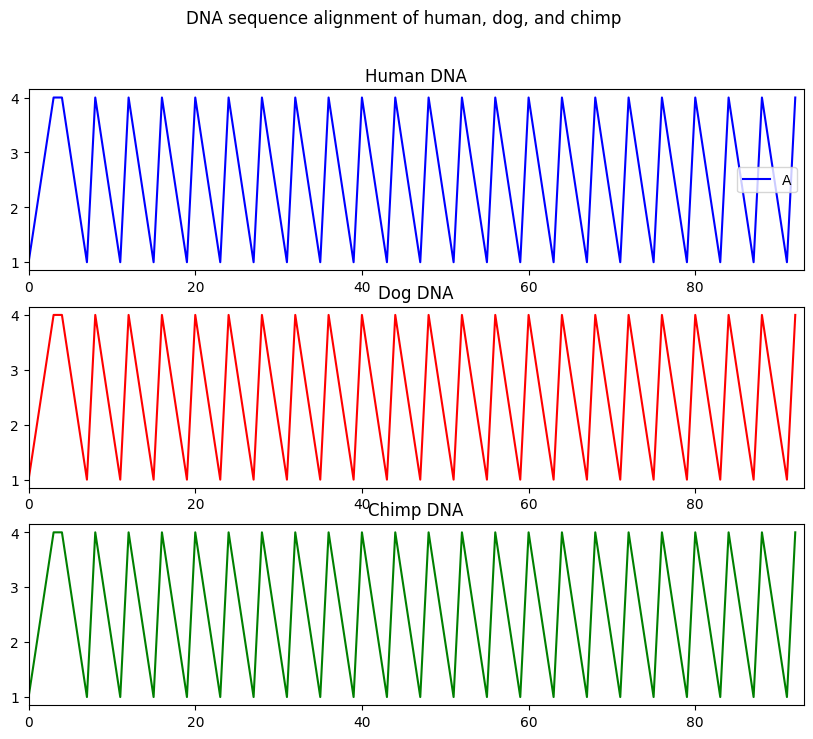

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with three subplots for each species
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

# Set the x-axis limits for all subplots
xlimits = (0, len(human_dna1))
for ax in axs:
    ax.set_xlim(xlimits)
    
# Plot the DNA sequence for human in the first subplot
axs[0].plot(range(len(human_dna1)), [1 if c == "A" else 2 if c == "T" else 3 if c == "C" else 4 for c in human_dna1], color="blue")
axs[0].set_title("Human DNA")

# Plot the DNA sequence for dog in the second subplot
axs[1].plot(range(len(dog_dna1)), [1 if c == "A" else 2 if c == "T" else 3 if c == "C" else 4 for c in dog_dna1], color="red")
axs[1].set_title("Dog DNA")

# Plot the DNA sequence for chimp in the third subplot
axs[2].plot(range(len(chimp_dna1)), [1 if c == "A" else 2 if c == "T" else 3 if c == "C" else 4 for c in chimp_dna1], color="green")
axs[2].set_title("Chimp DNA")

# Add a legend for the color coding of nucleotides
axs[0].legend(["A", "T", "C", "G"])

# Set the overall title for the figure
fig.suptitle("DNA sequence alignment of human, dog, and chimp")

# Show the plot
plt.show()

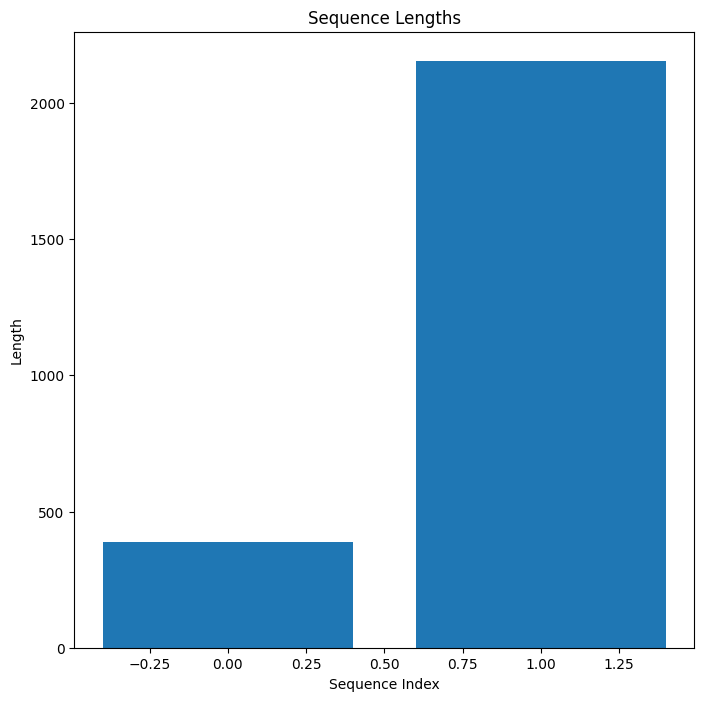

In [ ]:
import matplotlib.pyplot as plt
from Bio import SeqIO

# Load the sequences from the FASTA file
sequences = []
for record in SeqIO.parse("/content/drive/MyDrive/DNA SEQUENCING/example.fa", "fasta"):
    sequences.append(str(record.seq))

# Define the x-axis values
x_values = range(len(sequences))

# Plot the length of each sequence as a vertical bar
sequence_lengths = [len(seq) for seq in sequences]
plt.bar(x_values, sequence_lengths)

# Customize the plot
plt.title("Sequence Lengths")
plt.xlabel("Sequence Index")
plt.ylabel("Length")
plt.show()

<Axes: >

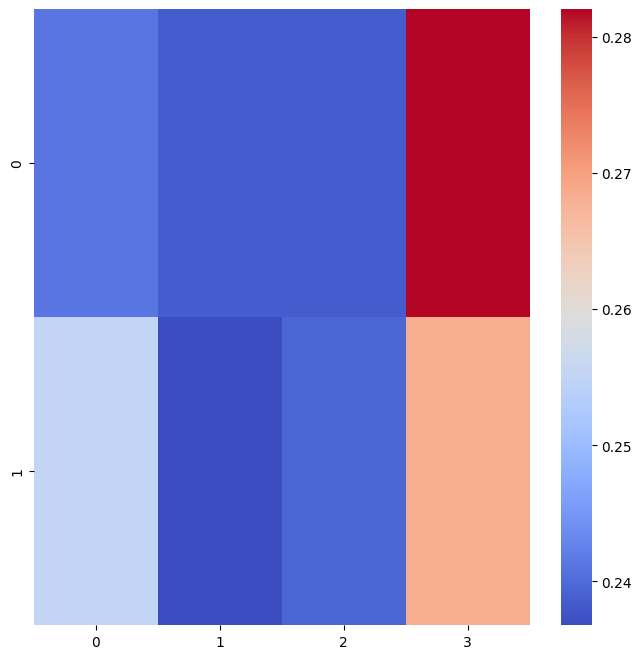

In [ ]:
import seaborn as sns
from Bio import SeqIO
import numpy as np

# Load the DNA sequence data from a FASTA file
sequences = []
labels = []
for record in SeqIO.parse("/content/drive/MyDrive/DNA SEQUENCING/example.fa", "fasta"):
    sequences.append(str(record.seq))
    labels.append(record.id)

# Calculate the nucleotide frequency for each sequence
nucleotides = ['A', 'C', 'G', 'T']
freqs = []
for seq in sequences:
    freq = []
    for nt in nucleotides:
        freq.append(seq.count(nt) / len(seq))
    freqs.append(freq)

# Convert the list of frequency lists to a NumPy array
matrix = np.array(freqs)

# Plot the heatmap using Seaborn
sns.heatmap(matrix, cmap='coolwarm')

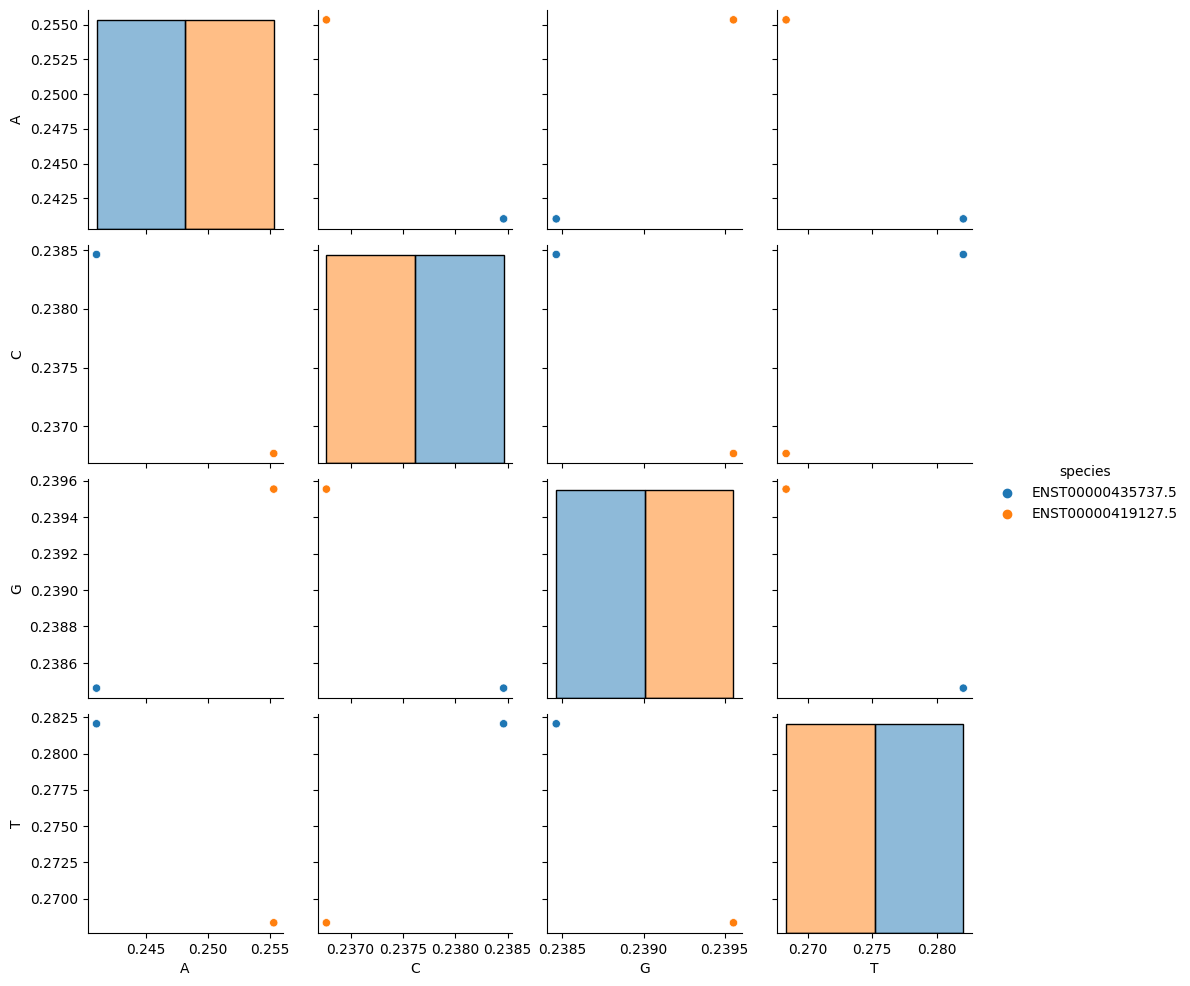

In [ ]:
import seaborn as sns
import pandas as pd
from Bio import SeqIO

# Define the nucleotides of interest
nucleotides = ['A', 'C', 'G', 'T']

# Load the DNA sequence data from a FASTA file
sequences = []
labels = []
for record in SeqIO.parse("/content/drive/MyDrive/DNA SEQUENCING/example.fa", "fasta"):
    sequences.append(str(record.seq))
    labels.append(record.id)

# Calculate the nucleotide frequency for each sequence
freqs = []
for seq in sequences:
    freq = []
    for nt in nucleotides:
        freq.append(seq.count(nt) / len(seq))
    freqs.append(freq)

# Convert the list of frequency lists to a Pandas DataFrame
data = pd.DataFrame(freqs, columns=nucleotides)
data['species'] = labels

# Plot the pairplot using Seaborn
sns.pairplot(data, hue='species', diag_kind='hist')

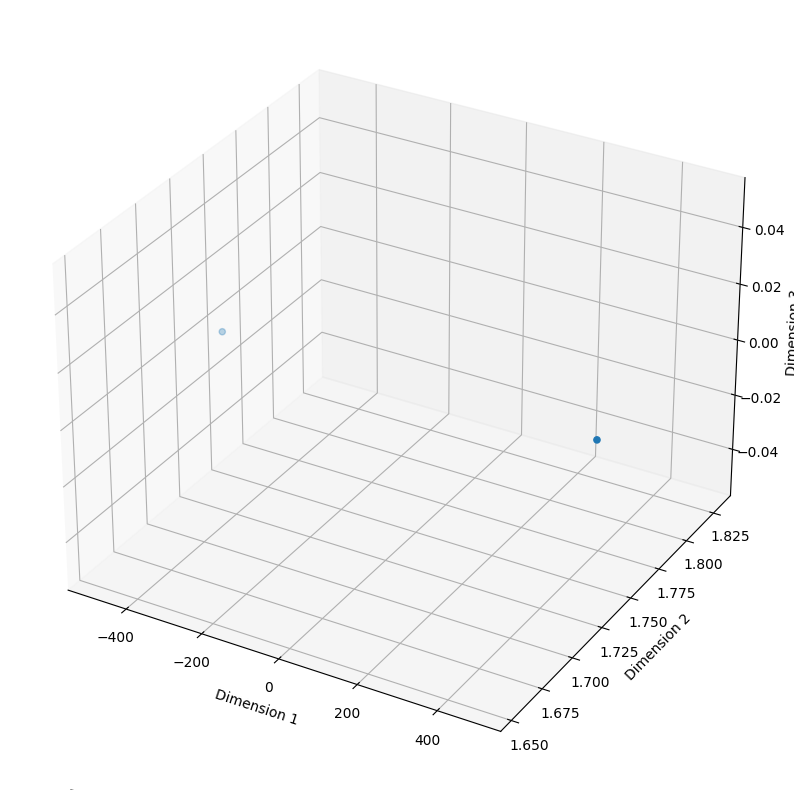

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from Bio import SeqIO
from sklearn.manifold import TSNE

# Load the DNA sequence data from a FASTA file
sequences = []
labels = []
for record in SeqIO.parse("/content/drive/MyDrive/DNA SEQUENCING/example.fa", "fasta"):
    sequences.append(str(record.seq))
    labels.append(record.id)

# Calculate the nucleotide frequency for each sequence
nucleotides = ['A', 'C', 'G', 'T']
X = np.zeros((len(sequences), len(nucleotides)))
for i, seq in enumerate(sequences):
    for j, nt in enumerate(nucleotides):
        X[i, j] = seq.count(nt) / len(seq)

# Use t-SNE to reduce the dimensionality of the data
tsne = TSNE(n_components=2, perplexity=int(np.sqrt(len(sequences))), random_state=0)
X_tsne = tsne.fit_transform(X)

# Create a 3D plot of the t-SNE embeddings
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], s=20)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()

Simple Artificial Neural Network

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from Bio import SeqIO

# Load the DNA sequence data from a FASTA file
sequences = []
labels = []
for record in SeqIO.parse("/content/drive/MyDrive/DNA SEQUENCING/example.fa", "fasta"):
    sequences.append(str(record.seq))
    labels.append(record.id)

# Calculate the nucleotide frequency for each sequence
nucleotides = ['A', 'C', 'G', 'T']
X = []
for seq in sequences:
    freq = []
    for nt in nucleotides:
        freq.append(seq.count(nt) / len(seq))
    X.append(freq)

# Convert the labels to numerical values
#y = np.array([int(label[0]) for label in labels])
y = np.array([int(label[0]) if label[0].isdigit() else 0 for label in labels])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the artificial neural network
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, alpha=0.01, solver='adam', random_state=42)
clf.fit(X_train, y_train)

# Evaluate the performance of the artificial neural network
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Confusion Matrix:

[[1]]


In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from Bio import SeqIO

# Load the DNA sequence data from text files
sequences = []
labels = []
for file, label in [("/content/drive/MyDrive/DNA SEQUENCING/human_data.txt", "human"), ("/content/drive/MyDrive/DNA SEQUENCING/chimp_data.txt", "chimp"), ("/content/drive/MyDrive/DNA SEQUENCING/dog_data.txt", "dog")]:
    with open(file) as f:
        sequence = f.read().replace("\n", "")
    sequences.append(sequence)
    labels.append(label)

# Calculate the nucleotide frequency for each sequence
nucleotides = ['A', 'C', 'G', 'T']
X = []
for seq in sequences:
    freq = []
    for nt in nucleotides:
        freq.append(seq.count(nt) / len(seq))
    X.append(freq)

# Convert the labels to numerical values
label_dict = {"human": 0, "chimp": 1, "dog": 2}
y = np.array([label_dict[label] for label in labels])

# Train the artificial neural network on the full dataset
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, alpha=0.01, solver='adam', random_state=42)
clf.fit(X, y)

# Make predictions on the test dataset
predictions = clf.predict(X)

# Print the predicted species for each sequence
for sequence, label, prediction in zip(sequences, labels, predictions):
    print(f"Sequence: {sequence[:20]}...{sequence[-20:]}")
    print(f"True label: {label}")
    print(f"Predicted label: {list(label_dict.keys())[prediction]}")
    print()

Sequence: sequence	classATGCCC...GGTGTGTCACATTATCAG	6
True label: human
Predicted label: human

Sequence: sequence	classATGCCC...GATCATATGTACCACTGA	3
True label: chimp
Predicted label: human

Sequence: sequence	classATGCCA...CATATCATACTGAAGTAG	6
True label: dog
Predicted label: human



(4380, 232414)
(1682, 232414)
(820, 232414)
(3504, 232414)
(876, 232414)
Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984
Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall 

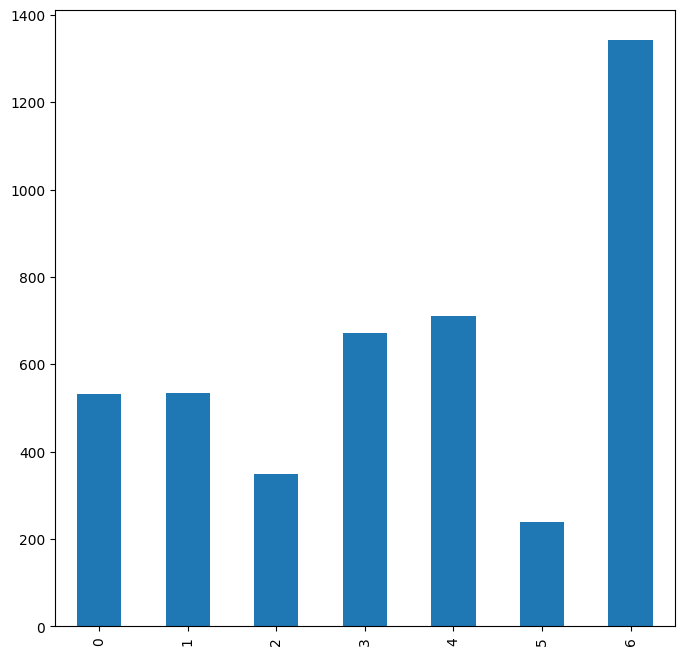

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline  

human_dna = pd.read_table('/content/drive/MyDrive/DNA SEQUENCING/human_data.txt')
human_dna.head()

chimp_dna = pd.read_table('/content/drive/MyDrive/DNA SEQUENCING/chimp_data.txt')
chimp_dna.head()

dog_dna = pd.read_table('/content/drive/MyDrive/DNA SEQUENCING/dog_data.txt')
dog_dna.head()


#Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string.
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

#Now we can convert our training data sequences into short overlapping k-mers of legth 6. Lets do that for each species of data we have using our getKmers function.
human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)
chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)
dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

#Now, our coding sequence data is changed to lowercase, split up into all possible k-mer words of length 6 and ready for the next step.

#Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into #string sentences of words that the count vectorizer can use. We can also make a y variable to hold the class labels.
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna


#Now let's do the same for chimp and dog.
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = chimp_dna.iloc[:, 0].values # y_chim for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna

#Now let's review how to use sklearn's "Natural Language" Processing tools to convert our k-mer words into uniform length numerical vectors that represent counts for #every k-mer in the vocabulary

# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

#Let's see what we have... for human we have 4380 genes converted into uniform length feature vectors of 4-gram k-mer (length 6) counts. For chimp and dog we have the expected same number of features with 1682 and 820 genes respectively.

print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

human_dna['class'].value_counts().sort_index().plot.bar()

chimp_dna['class'].value_counts().sort_index().plot.bar()

dog_dna['class'].value_counts().sort_index().plot.bar()

"""
So now that we know how to transform our DNA sequences into uniform length numerical vectors in the form of k-mer counts and ngrams, we can now go ahead and build a classification model that can predict the DNA sequence function based only on the sequence itself.
Here I will use the human data to train the model, holding out 20% of the human data to test the model. Then we can really challenge the model's generalizability by trying to predict sequence function in other species (the chimpanzee and dog).
So below we will - 1: train/test spit. 2: Build simple multinomial naive Bayes classifier and 3: test the model performance."""

# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_human, 
                                                    test_size = 0.20, 
                                                    random_state=42)


print(X_train.shape)
print(X_test.shape)

#A multinomial naive Bayes classifier will be created. I previously did some parameter tuning and found the ngram size of 4 (reflected in the Countvectorizer() instance) and a model alpha of 0.1 did the best. Just to keep it simple I won't show that code here.

### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

#Now let's make predictions on the human hold out test set and see how it performes on unseen data.

y_pred = classifier.predict(X_test)

"""
Okay, so let's look at some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score. We are getting really good results on our unseen data, so it looks like our model did not overfit to the training data. In a real project I would go back and sample many more train test splits since we have a relatively small data set.
"""
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

"""
Now for the real test. Let's see how our model perfoms on the DNA sequences from other species. First we'll try the Chimpanzee, which we would expect to be very similar to human. Then we will try man's (and woman's) best friend, the Dog DNA sequences.
"""
#Make predictions for the Chimp and dog sequences¶

# Predicting the chimp, dog and worm sequences
y_pred_chimp = classifier.predict(X_chimp)
y_pred_dog = classifier.predict(X_dog)

# performance on chimp genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

# performance on dog genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))